In [ ]:

import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from io import StringIO
from IPython.display import Image
import graphviz

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Считаем данные и выделим тестовую и обучающую выборки

In [ ]:
data = pd.read_csv('./banana_quality.csv')
data.head()


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [ ]:
from sklearn.preprocessing import LabelEncoder
X = data.drop('Quality', axis=1)
y = data['Quality']#ключевое значени
label_encoder = LabelEncoder()
y = data['Quality'] = label_encoder.fit_transform(data['Quality'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучим модель бэггинга

1.   Новый пункт
2.   Новый пункт



In [ ]:
# Обучим классификатор на 5 деревьях
bc1 = BaggingClassifier(n_estimators=5, oob_score=True, random_state=3)
bc1.fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(n_estimators=5, oob_score=True, random_state=3)

In [ ]:
# Какие объекты были использованы в обучающей выборке каждого дерева
bc1.estimators_samples_

[array([5888, 4896, 5446, ..., 3771, 3989, 3234]),
 array([ 167, 4292, 1847, ..., 1904, 3488, 2383]),
 array([5481, 4659, 7437, ..., 5146, 6889, 4334]),
 array([1354,   32, 3926, ..., 7066, 5090, 5883]),
 array([6270, 2331, 5432, ..., 4413,  894, 7109])]

In [ ]:
# Сконвертируем эти данные в двоичную матрицу,
# 1 соответствует элементам, попавшим в обучающую выборку
bin_array = np.zeros((5, X.shape[0]))
for i in range(5):
    for j in bc1.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[1., 0., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 1., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

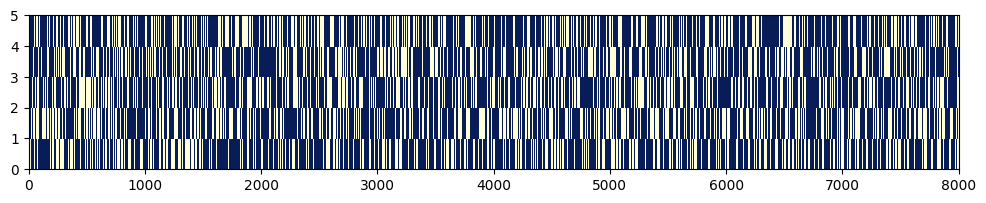

In [ ]:
# И визуализируем (синим цветом показаны данные, которые попали в обучающую выборку)
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='YlGnBu')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       781
           1       0.99      1.00      1.00       819

    accuracy                           0.99      1600
   macro avg       1.00      0.99      0.99      1600
weighted avg       1.00      0.99      0.99      1600



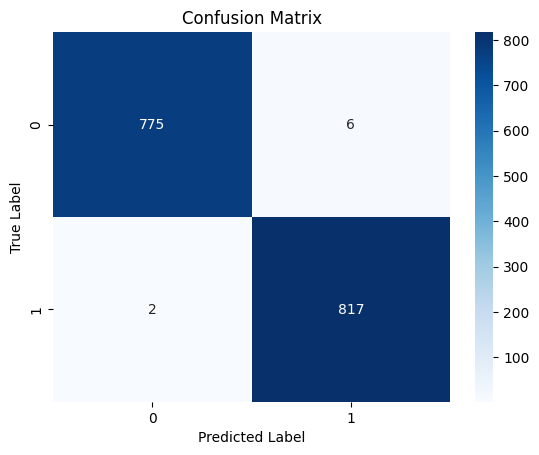

In [ ]:


# Make predictions on the test set
y_pred = bc1.predict(X_test)

# Evaluate the classifier
print('Classification Report:')
print(classification_report(y_test, y_pred))
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Обучим модель случайного леса

In [ ]:
# Обучим классификатор на 5 деревьях
tree1 = RandomForestClassifier(n_estimators=5, oob_score=True, random_state=10)
tree1.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(n_estimators=5, oob_score=True, random_state=10)

In [ ]:
# Out-of-bag error, возвращаемый классификатором
tree1.oob_score_, 1-tree1.oob_score_

(0.882125, 0.11787499999999995)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       781
           1       0.99      0.99      0.99       819

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



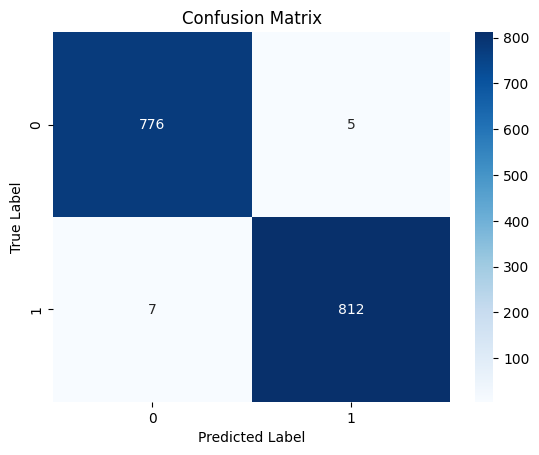

In [ ]:

# Make predictions on the test set
y_pred = tree1.predict(X_test)

# Evaluate the classifier
print('Classification Report:')
print(classification_report(y_test, y_pred))
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Обучим модель AdaBoost


In [ ]:
# Обучим классификатор на 5 деревьях
ab1 = AdaBoostClassifier(n_estimators=5, algorithm='SAMME', random_state=10)
ab1.fit(X, y)

AdaBoostClassifier(algorithm='SAMME', n_estimators=5, random_state=10)

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       781
           1       0.92      0.66      0.77       819

    accuracy                           0.80      1600
   macro avg       0.82      0.80      0.79      1600
weighted avg       0.82      0.80      0.79      1600



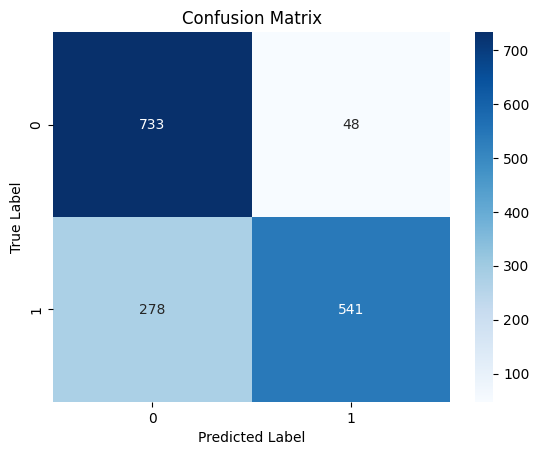

In [ ]:

# Make predictions on the test set
y_pred = ab1.predict(X_test)

# Evaluate the classifier
print('Classification Report:')
print(classification_report(y_test, y_pred))
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Обучим модель градиентного бустинга

In [ ]:
 gb = GradientBoostingClassifier(random_state = 1)
 gb.fit(X, y)

GradientBoostingClassifier(random_state=1)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       781
           1       0.97      0.97      0.97       819

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



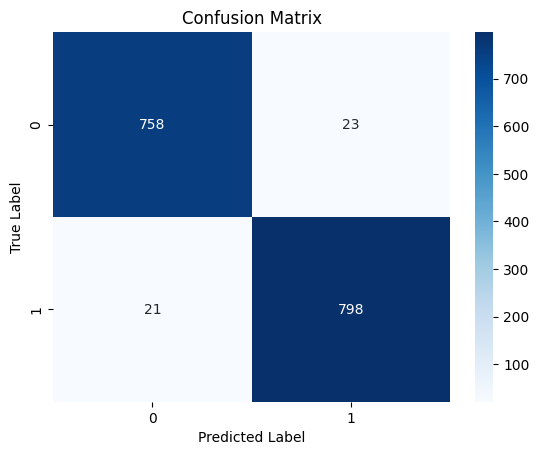

In [ ]:

# Make predictions on the test set
y_pred = gb.predict(X_test)

# Evaluate the classifier
print('Classification Report:')
print(classification_report(y_test, y_pred))
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()